In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv("files/extruder1407_tagged.csv")

In [8]:
df.set_index('utctimestamp', inplace=True)
df.index = pd.to_datetime(df.index, unit='ns')

In [28]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2795736 entries, 2021-06-02 15:33:52 to 2021-07-14 07:06:44
Data columns (total 114 columns):
 #    Column                    Non-Null Count    Dtype  
---   ------                    --------------    -----  
 0    A-MeltPress-Die           2795736 non-null  float64
 1    A-MonomerFlap             2795736 non-null  float64
 2    A-QuenchingCab-Press      2795736 non-null  float64
 3    A-CoolingAir-FlowRate     2795736 non-null  float64
 4    A2-CoolingAir-FlowRate    2795736 non-null  float64
 5    A-ProcessAir-Ratio        2795736 non-null  float64
 6    A-Extruder-Speed          2795736 non-null  float64
 7    A-SpinPump-Speed          2795736 non-null  float64
 8    A-SuctionAirFan-Speed     2795736 non-null  float64
 9    A2-SuctionAirFan-Speed    2795736 non-null  float64
 10   A1-PA-CoolingAir-Temp     2795736 non-null  float64
 11   A2-PA-CoolingAir-Temp     2795736 non-null  float64
 12   B-MeltPress-Die           2795736 n

In [17]:
df.drop(['L-SpinBelt-current-ACT', 'L-SpinBelt-speed-set', 'L-SpinBelt-Speed', 'L-SpinBelt-speed-act'], axis=1, inplace=True)

## Applico una normalizzazione min max 0-1

In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0.01,1))
df_scaled=df
df_scaled[df_scaled.columns] = scaler.fit_transform(df)

C:\Users\gabri\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:375: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
C:\Users\gabri\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:376: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


## Elimino le variabili costanti o quasi costanti

In [14]:
df=df_scaled
variance=df.var()
columns=df.columns
col_to_keep = [ ]
for i in range(0,len(variance)):
    if variance[i]>=0.0001: #setting the threshold as 0.01%
        col_to_keep.append(columns[i])
new_data = df[col_to_keep]

In [15]:
new_data.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2795736 entries, 2021-06-02 15:33:52 to 2021-07-14 07:06:44
Data columns (total 99 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   A-MeltPress-Die           2795736 non-null  float64
 1   A-MonomerFlap             2795736 non-null  float64
 2   A-QuenchingCab-Press      2795736 non-null  float64
 3   A-CoolingAir-FlowRate     2795736 non-null  float64
 4   A2-CoolingAir-FlowRate    2795736 non-null  float64
 5   A-ProcessAir-Ratio        2795736 non-null  float64
 6   A-Extruder-Speed          2795736 non-null  float64
 7   A-SpinPump-Speed          2795736 non-null  float64
 8   A-SuctionAirFan-Speed     2795736 non-null  float64
 9   A2-SuctionAirFan-Speed    2795736 non-null  float64
 10  A1-PA-CoolingAir-Temp     2795736 non-null  float64
 11  A2-PA-CoolingAir-Temp     2795736 non-null  float64
 12  B-MeltPress-Die           2795736 non-null  float64

## Esempio di una variabile quasi costante eliminata

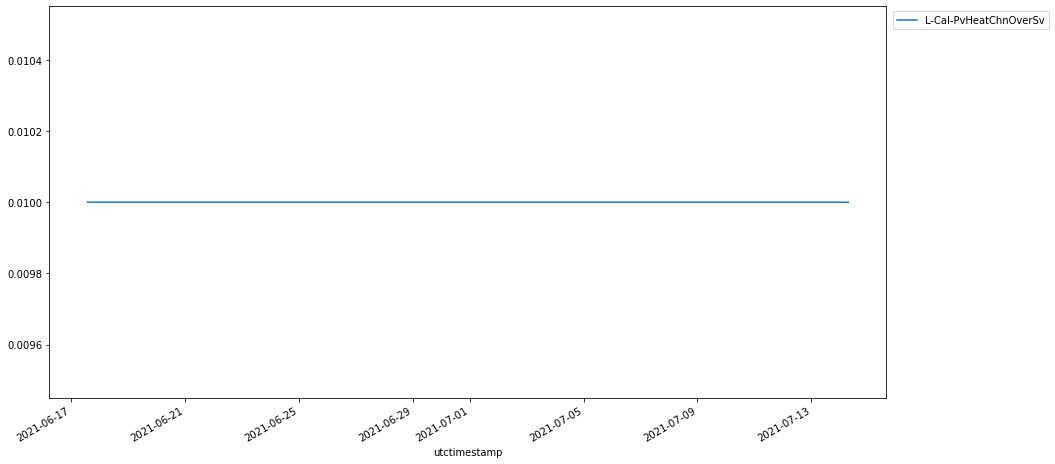

In [16]:
df['L-Cal-PvHeatChnOverSv'].plot(figsize=(15,8)).legend(loc='upper right', bbox_to_anchor=(1.2, 1.0))

In [17]:
new_data.to_csv('files/extruder1407_newpreprocessing.csv', index=True)

In [18]:
df=new_data
#df=pd.read_csv("files/extruder1407_newpreprocessing.csv")

In [19]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2795736 entries, 2021-06-02 15:33:52 to 2021-07-14 07:06:44
Data columns (total 99 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   A-MeltPress-Die           2795736 non-null  float64
 1   A-MonomerFlap             2795736 non-null  float64
 2   A-QuenchingCab-Press      2795736 non-null  float64
 3   A-CoolingAir-FlowRate     2795736 non-null  float64
 4   A2-CoolingAir-FlowRate    2795736 non-null  float64
 5   A-ProcessAir-Ratio        2795736 non-null  float64
 6   A-Extruder-Speed          2795736 non-null  float64
 7   A-SpinPump-Speed          2795736 non-null  float64
 8   A-SuctionAirFan-Speed     2795736 non-null  float64
 9   A2-SuctionAirFan-Speed    2795736 non-null  float64
 10  A1-PA-CoolingAir-Temp     2795736 non-null  float64
 11  A2-PA-CoolingAir-Temp     2795736 non-null  float64
 12  B-MeltPress-Die           2795736 non-null  float64

## Visualizzazione grafica dei gap temporali dovuti a parti precedenti delle TS non valorizzate (NaN)

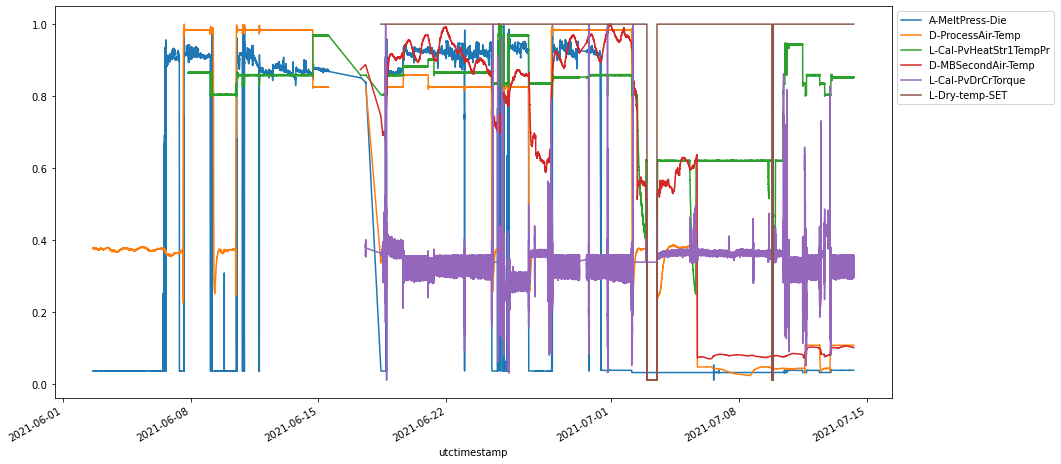

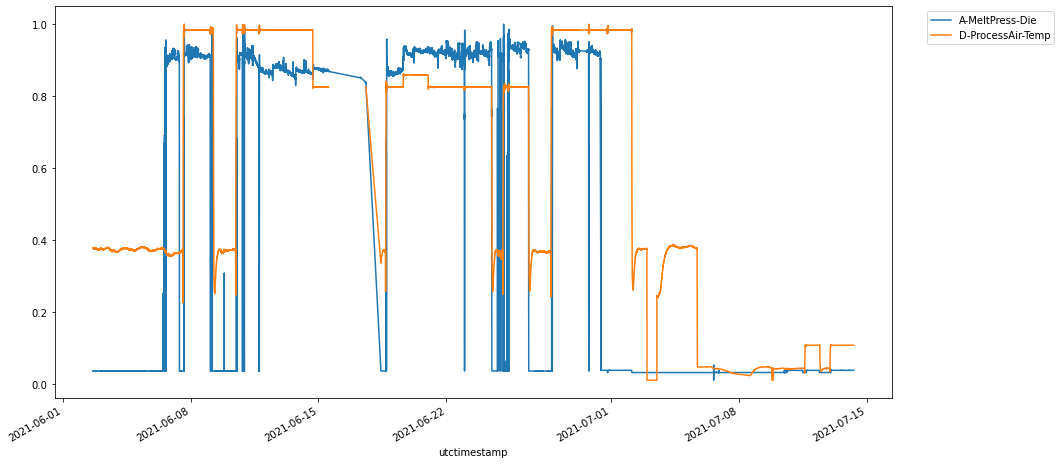

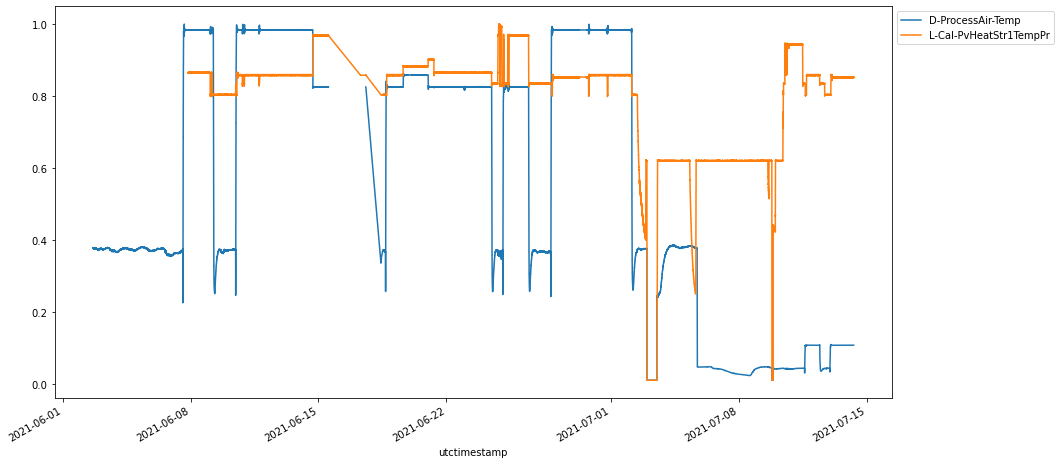

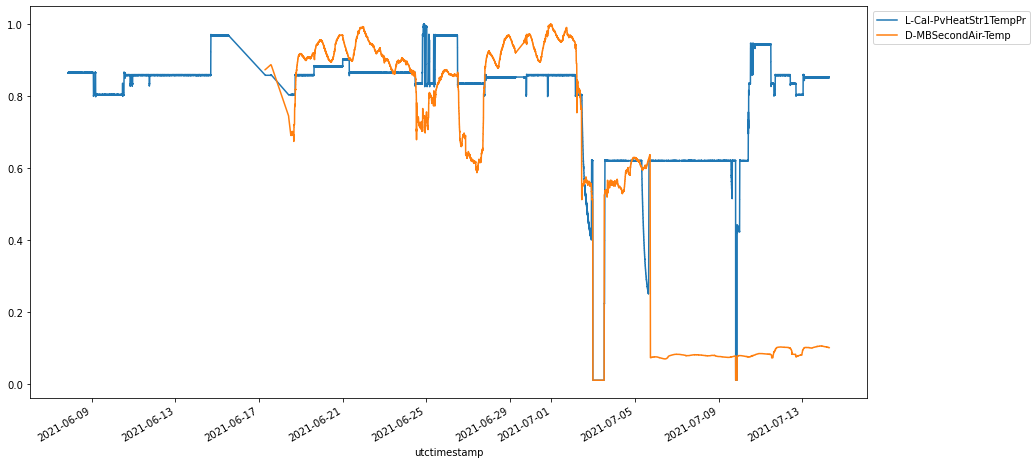

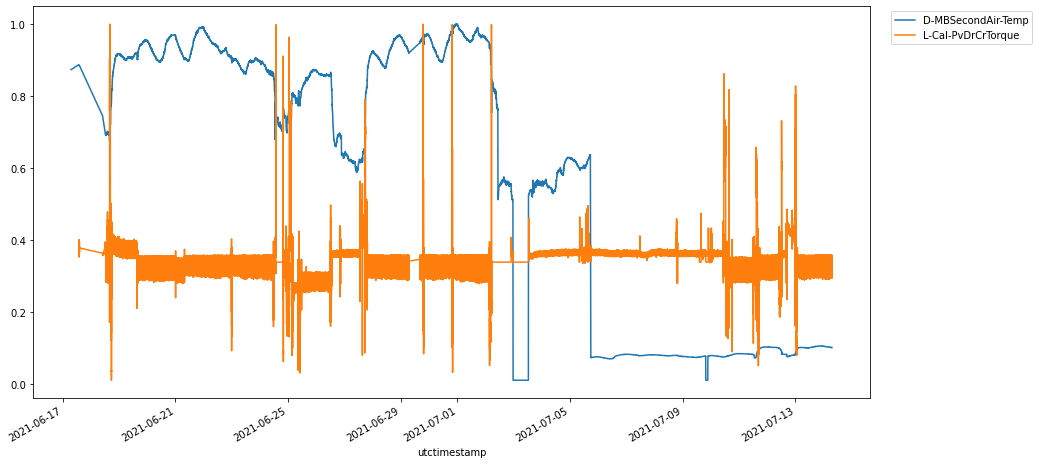

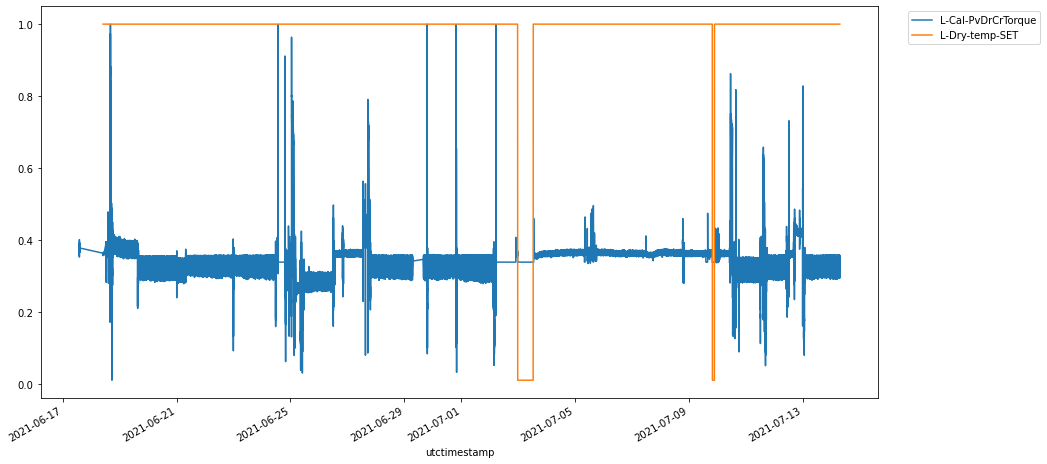

In [20]:
columns=['A-MeltPress-Die', 'D-ProcessAir-Temp', 'L-Cal-PvHeatStr1TempPr', 'D-MBSecondAir-Temp', 'L-Cal-PvDrCrTorque', 'L-Dry-temp-SET']
df[columns].plot(figsize=(15,8)).legend(loc='upper right', bbox_to_anchor=(1.2, 1.0))
columns=['A-MeltPress-Die', 'D-ProcessAir-Temp']
df[columns].plot(figsize=(15,8)).legend(loc='upper right', bbox_to_anchor=(1.2, 1.0))
columns=['D-ProcessAir-Temp', 'L-Cal-PvHeatStr1TempPr']
df[columns].plot(figsize=(15,8)).legend(loc='upper right', bbox_to_anchor=(1.2, 1.0))
columns=['L-Cal-PvHeatStr1TempPr', 'D-MBSecondAir-Temp']
df[columns].plot(figsize=(15,8)).legend(loc='upper right', bbox_to_anchor=(1.2, 1.0))
columns=['D-MBSecondAir-Temp', 'L-Cal-PvDrCrTorque']
df[columns].plot(figsize=(15,8)).legend(loc='upper right', bbox_to_anchor=(1.2, 1.0))
columns=['L-Cal-PvDrCrTorque', 'L-Dry-temp-SET']
df[columns].plot(figsize=(15,8)).legend(loc='upper right', bbox_to_anchor=(1.2, 1.0))

In [22]:
"""import matplotlib.patches as mpatches
from msda.msda import *
df_filled=ExploratoryDataAnalysis.impute(df, modes=5)
df_filled.info()"""

'import matplotlib.patches as mpatches\nfrom msda.msda import *\ndf_filled=ExploratoryDataAnalysis.impute(df, modes=5)\ndf_filled.info()'

In [28]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    print(df['L-Dry-temp-SET'])

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [50]:
df_cut=df['2021-06-18':'2022-08-31']

In [51]:
df_cut.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1851202 entries, 2021-06-18 10:06:53 to 2021-07-14 07:06:44
Data columns (total 99 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   A-MeltPress-Die           1851202 non-null  float64
 1   A-MonomerFlap             1851202 non-null  float64
 2   A-QuenchingCab-Press      1851202 non-null  float64
 3   A-CoolingAir-FlowRate     1851202 non-null  float64
 4   A2-CoolingAir-FlowRate    1851202 non-null  float64
 5   A-ProcessAir-Ratio        1851202 non-null  float64
 6   A-Extruder-Speed          1851202 non-null  float64
 7   A-SpinPump-Speed          1851202 non-null  float64
 8   A-SuctionAirFan-Speed     1851202 non-null  float64
 9   A2-SuctionAirFan-Speed    1851202 non-null  float64
 10  A1-PA-CoolingAir-Temp     1851202 non-null  float64
 11  A2-PA-CoolingAir-Temp     1851202 non-null  float64
 12  B-MeltPress-Die           1851202 non-null  float64

<AxesSubplot:>

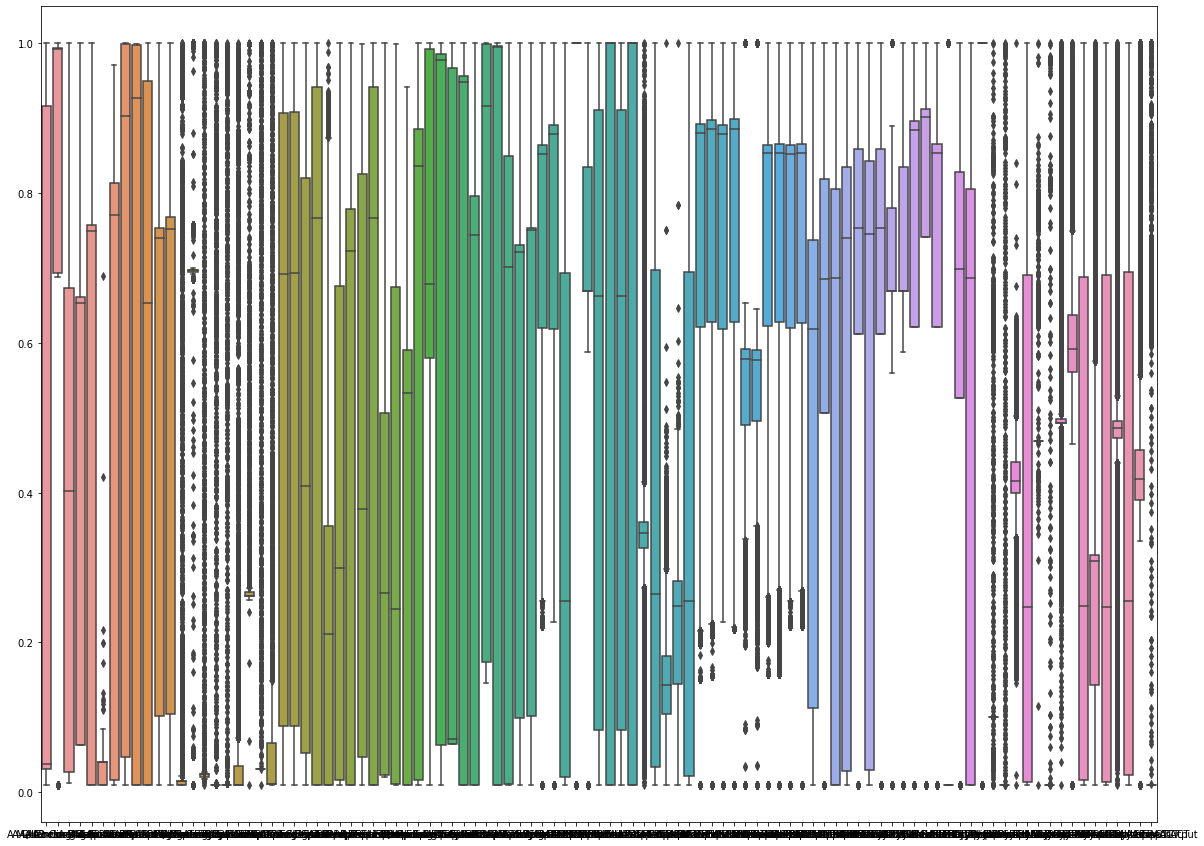

In [52]:
df=df_cut
plt.figure(figsize=(20,15))
sns.boxplot(data=df)

## Riduco se possibile il tipo di dato da float64 a float32 per gestire meglio i dati in memoria e salvo il nuovo dataset

In [53]:
from dataprep.clean import clean_df

_, cleaned_df = clean_df(df,  downcast_memory = True, remove_duplicate_entries=False)
cleaned_df.dtypes

NumExpr defaulting to 4 threads.


Data Type Detection Report:
	These data types are supported by DataPrep to clean: ['coordinate']
Column Headers Cleaning Report:
	99 values cleaned (100.0%)
Downcast Memory Report:
	Memory reducted from 1664230598 to 747885608. New size: (44.94%)


a_melt_press_die                 float32
a_monomer_flap                   float32
a_quenching_cab_press            float32
a_cooling_air_flow_rate          float32
a_2_cooling_air_flow_rate        float32
a_process_air_ratio              float32
a_extruder_speed                 float32
a_spin_pump_speed                float32
a_suction_air_fan_speed          float32
a_2_suction_air_fan_speed        float32
a_1_pa_cooling_air_temp          float32
a_2_pa_cooling_air_temp          float32
b_melt_press_die                 float32
b_monomer_flap                   float32
b_quenching_cab_press            float32
b_cooling_air_flow_rate          float32
b_2_cooling_air_flow_rate        float32
b_extruder_speed                 float32
b_spin_pump_speed                float32
b_suction_air_fan_speed          float32
b_2_suction_air_fan_speed        float32
b_1_pa_cooling_air_temp          float32
b_2_pa_cooling_air_temp          float32
c_process_air_temp               float32
c_process_air_vo

In [54]:
cleaned_df

,a_melt_press_die,a_monomer_flap,a_quenching_cab_press,a_cooling_air_flow_rate,a_2_cooling_air_flow_rate,a_process_air_ratio,a_extruder_speed,a_spin_pump_speed,a_suction_air_fan_speed,a_2_suction_air_fan_speed,...,l_dry_exh_fan_speed_act,l_dry_exit_roll_curr_act,l_dry_exit_roll_relat,l_dry_exit_roll_speed_act,l_dry_intk_roll_curr_act,l_dry_intk_roll_speed_act,l_dry_out_roll_curr_act,l_dry_out_roll_speed_act,l_dry_temp_act,l_dry_temp_output
0,0.035567,0.694265,0.022273,0.062639,0.010000,0.010000,0.033408,0.052834,0.715549,0.405519,...,0.01,0.501593,0.483428,0.027758,0.149883,0.024961,0.501586,0.033877,0.593579,0.01
1,0.035567,0.694265,0.022273,0.062639,0.010000,0.010000,0.032395,0.052989,0.714899,0.405962,...,0.01,0.502518,0.483428,0.027788,0.149343,0.024916,0.501919,0.033948,0.593579,0.01
2,0.035567,0.694265,0.022273,0.062639,0.010000,0.010000,0.034196,0.053534,0.715456,0.405646,...,0.01,0.502052,0.483428,0.027881,0.148832,0.024923,0.501240,0.034078,0.593579,0.01
3,0.035567,0.694265,0.022273,0.062639,0.010000,0.010000,0.034421,0.052756,0.715363,0.405962,...,0.01,0.498722,0.483428,0.028093,0.149177,0.024816,0.499682,0.034307,0.593579,0.01
4,0.035567,0.694265,0.022273,0.062639,0.010000,0.010000,0.032395,0.052834,0.715456,0.405962,...,0.01,0.500842,0.483428,0.027818,0.149520,0.024802,0.501044,0.033961,0.593579,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1851197,0.037735,1.000000,0.403433,0.659588,0.756154,0.040733,0.866529,0.998678,0.997583,0.949643,...,0.01,0.491412,0.592448,0.687509,0.316049,0.691347,0.468487,0.694866,0.437263,0.01
1851198,0.037735,1.000000,0.404025,0.659588,0.756154,0.040733,0.868330,0.999067,0.997397,0.949390,...,0.01,0.491233,0.592448,0.687465,0.315752,0.691325,0.468346,0.694886,0.437263,0.01
1851199,0.037745,1.000000,0.404025,0.658359,0.757190,0.040733,0.864841,0.998834,0.996839,0.949516,...,0.01,0.490976,0.592448,0.687549,0.315919,0.691385,0.468243,0.694905,0.437263,0.01
1851200,0.037735,1.000000,0.404616,0.658359,0.757190,0.040733,0.864504,0.998912,0.997397,0.949579,...,0.01,0.490618,0.592448,0.687540,0.315736,0.691400,0.468279,0.694920,0.437263,0.01


In [55]:
cleaned_df.index=df.index

In [56]:
cleaned_df.columns=df.columns

In [57]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1851202 entries, 2021-06-18 10:06:53 to 2021-07-14 07:06:44
Data columns (total 99 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   A-MeltPress-Die           float32
 1   A-MonomerFlap             float32
 2   A-QuenchingCab-Press      float32
 3   A-CoolingAir-FlowRate     float32
 4   A2-CoolingAir-FlowRate    float32
 5   A-ProcessAir-Ratio        float32
 6   A-Extruder-Speed          float32
 7   A-SpinPump-Speed          float32
 8   A-SuctionAirFan-Speed     float32
 9   A2-SuctionAirFan-Speed    float32
 10  A1-PA-CoolingAir-Temp     float32
 11  A2-PA-CoolingAir-Temp     float32
 12  B-MeltPress-Die           float32
 13  B-MonomerFlap             float32
 14  B-QuenchingCab-Press      float32
 15  B-CoolingAir-FlowRate     float32
 16  B2-CoolingAir-FlowRate    float32
 17  B-Extruder-Speed          float32
 18  B-SpinPump-Speed          float32
 19  B-SuctionAirFan-Speed     floa

In [58]:
cleaned_df.head()

,A-MeltPress-Die,A-MonomerFlap,A-QuenchingCab-Press,A-CoolingAir-FlowRate,A2-CoolingAir-FlowRate,A-ProcessAir-Ratio,A-Extruder-Speed,A-SpinPump-Speed,A-SuctionAirFan-Speed,A2-SuctionAirFan-Speed,...,L-Dry-exhFan-speed-ACT,L-Dry-exitRoll-curr-ACT,L-Dry-exitRoll-relat,L-Dry-exitRoll-speed-ACT,L-Dry-intkRoll-curr-ACT,L-Dry-intkRoll-speed-ACT,L-Dry-outRoll-curr-ACT,L-Dry-outRoll-speed-ACT,L-Dry-temp-ACT,L-Dry-temp-output
utctimestamp,,,,,,,,,,,,,,,,,,,,,
2021-06-18 10:06:53,0.035567,0.694265,0.022273,0.062639,0.01,0.01,0.033408,0.052834,0.715549,0.405519,...,0.01,0.501593,0.483428,0.027758,0.149883,0.024961,0.501586,0.033877,0.593579,0.01
2021-06-18 10:06:54,0.035567,0.694265,0.022273,0.062639,0.01,0.01,0.032395,0.052989,0.714899,0.405962,...,0.01,0.502518,0.483428,0.027788,0.149343,0.024916,0.501919,0.033948,0.593579,0.01
2021-06-18 10:06:55,0.035567,0.694265,0.022273,0.062639,0.01,0.01,0.034196,0.053534,0.715456,0.405646,...,0.01,0.502052,0.483428,0.027881,0.148832,0.024923,0.501240,0.034078,0.593579,0.01
2021-06-18 10:06:57,0.035567,0.694265,0.022273,0.062639,0.01,0.01,0.034421,0.052756,0.715363,0.405962,...,0.01,0.498722,0.483428,0.028093,0.149177,0.024816,0.499682,0.034307,0.593579,0.01
2021-06-18 10:06:58,0.035567,0.694265,0.022273,0.062639,0.01,0.01,0.032395,0.052834,0.715456,0.405962,...,0.01,0.500842,0.483428,0.027818,0.149520,0.024802,0.501044,0.033961,0.593579,0.01


In [59]:
df=cleaned_df

In [60]:
df.to_csv('files/extruder1407_cleaned.csv', index=True)

## Faccio un resampling a 20s e salvo il dataset

In [62]:
df_resampled=df.resample('20s').mean()
df_resampled.to_csv('files/extruder1407_cleaned_resample20s.csv', index=True)

In [63]:
df_resampled.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 111781 entries, 2021-06-18 10:06:40 to 2021-07-14 07:06:40
Freq: 20S
Data columns (total 99 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   A-MeltPress-Die           109559 non-null  float32
 1   A-MonomerFlap             109559 non-null  float32
 2   A-QuenchingCab-Press      109559 non-null  float32
 3   A-CoolingAir-FlowRate     109559 non-null  float32
 4   A2-CoolingAir-FlowRate    109559 non-null  float32
 5   A-ProcessAir-Ratio        109559 non-null  float32
 6   A-Extruder-Speed          109559 non-null  float32
 7   A-SpinPump-Speed          109559 non-null  float32
 8   A-SuctionAirFan-Speed     109559 non-null  float32
 9   A2-SuctionAirFan-Speed    109559 non-null  float32
 10  A1-PA-CoolingAir-Temp     109559 non-null  float32
 11  A2-PA-CoolingAir-Temp     109559 non-null  float32
 12  B-MeltPress-Die           109559 non-null  float32
 13  

In [61]:
# commento perché creo un notebook a parte per l'analisi esplorativa, questo notebook pulito rimane per il PREPROCESSING
"""from dataprep.eda import create_report
report=create_report(df)
report"""

'from dataprep.eda import create_report\nreport=create_report(df)\nreport'